## Простой случайный сэмплинг


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_in = '../dataset/car7.csv'
dataset_out = '../dataset/car75.csv'

data=pd.read_csv(dataset_in, delimiter=',')

category2 = 'MSRP'

meanPrice=data[category2].median()
print(data[category2].min())
print(data[category2].max())
print(data[category2].mean())
print(data[category2].median())

2000
2065902
41939.532302743275
30675.0


In [3]:
data[category2] = data[category2].apply(lambda x: 1 if x > meanPrice else 0)
data[category2]

0        1
1        1
2        1
3        0
4        1
        ..
11186    1
11187    1
11188    1
11189    1
11190    0
Name: MSRP, Length: 11191, dtype: int64

In [4]:
X=data.iloc[:,:]
# Определение категорий
y = data[category2]

In [5]:
count_1 = data[category2][(data[category2] == 1)].value_counts()
count_0 = data[category2][(data[category2] == 0)].value_counts()
print(count_1)
print(count_0)

MSRP
1    5595
Name: count, dtype: int64
MSRP
0    5596
Name: count, dtype: int64


In [6]:
def stat(data, category):
    target_count = data[category].value_counts(dropna=True)
    print(target_count)
    target_count = data[category].value_counts(normalize=True, dropna=True)
    print(target_count)
    sns.countplot(x=category, data=data)
    plt.box(False)
    plt.xlabel('Outcome 1/0',fontsize=11)
    plt.ylabel('Количество наблюдений',fontsize=11)
    plt.show()

MSRP
0    5596
1    5595
Name: count, dtype: int64
MSRP
0    0.500045
1    0.499955
Name: proportion, dtype: float64


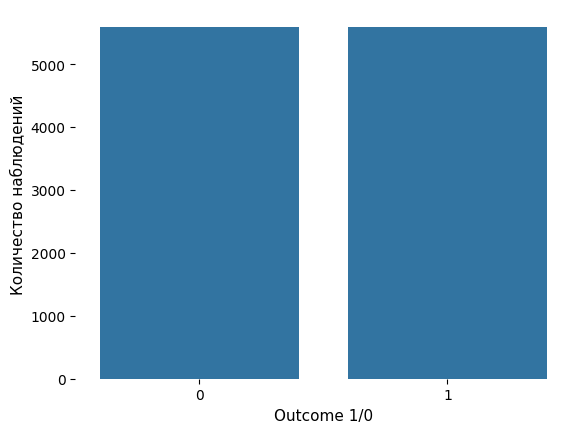

In [7]:
stat(data, category2)

Стратифицированный сэмплинг


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

# Создание объекта StratifiedShuffleSplit и задание количества итераций
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Генерация индексов для разделения на обучающую и тестовую выборки
train_index, test_index = next(stratified_split.split(X, y, y))

# Создание стратифицированных обучающей и тестовой выборок
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [9]:
print(X_train.shape)
X_train.iloc[:5,:]

(8952, 23)


,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,...,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize
4832,31,26,8,0.620380,6,3,0.036723,0.080292,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,33,25,8,0.331668,3,8,0.073446,0.131387,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7528,46,14,7,0.239760,3,0,0.067797,0.124088,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2862,27,15,8,0.384615,4,8,0.045198,0.080292,1,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6415,0,27,7,0.289710,3,3,0.076271,0.145985,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
print(y_train.shape)
y_train.iloc[:5]

(8952,)


4832    1
296     0
7528    0
2862    1
6415    1
Name: MSRP, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
X_train

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,...,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize
3172,29,27,9,0.145854,1,3,0.090395,0.197080,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2225,9,15,9,0.139860,1,14,0.093220,0.167883,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2091,45,17,9,0.154845,1,8,0.087571,0.153285,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4111,14,27,9,0.364635,3,3,0.059322,0.109489,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2476,9,7,9,0.199800,3,13,0.050847,0.102190,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,21,26,9,0.181818,1,3,0.079096,0.153285,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1259,4,24,8,0.349650,3,14,0.084746,0.160584,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7088,18,12,9,0.204795,3,3,0.056497,0.109489,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
10167,29,21,4,0.239760,3,3,0.070621,0.138686,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


MSRP
0    4197
1    4196
Name: count, dtype: int64
MSRP
0    0.50006
1    0.49994
Name: proportion, dtype: float64


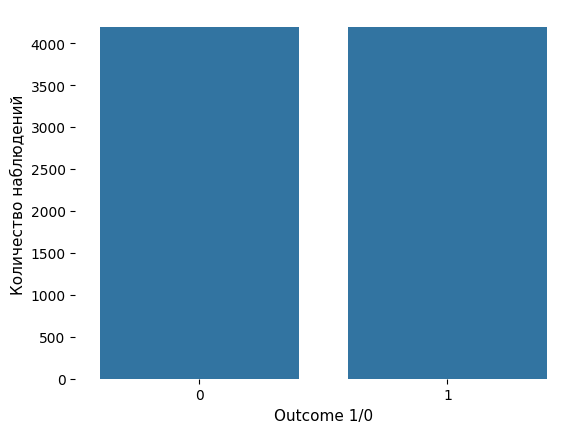

In [12]:
stat(X_train, category2)

In [13]:
data.to_csv(path_or_buf=dataset_out,index=False)
data

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,...,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize
0,4,21,8,0.334665,3,8,0.073446,0.138686,1,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4,21,8,0.299700,3,6,0.079096,0.138686,1,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4,21,8,0.299700,3,8,0.079096,0.145985,1,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,21,8,0.229770,3,8,0.079096,0.131387,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,21,8,0.229770,3,6,0.079096,0.131387,1,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,22,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11187,0,22,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11188,0,22,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11189,0,23,7,0.299700,3,2,0.064972,0.116788,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
